# Check FFT and labels

2018-08-22

In [32]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt

import os
from speech_features import SpeechFeatures
from preprocess import hp, find_elements
import numpy as np
from sklearn.decomposition import PCA

In [13]:
fft = np.load('fft_all.npy')
labels = np.load('labels.npy')

In [14]:
fft.shape, len(labels)

((38777, 513), 38777)

## 전체 FFT 뿌려보기

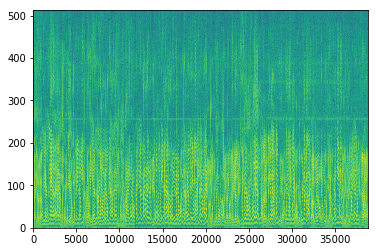

In [12]:
fig, ax = plt.subplots(facecolor='white')
ax.imshow(fft.T, aspect='auto', origin='lower')

## 특정 모음만 골라서 뿌려보기

In [15]:
vowel_list = list(set(labels))
print(vowel_list)

['AA1', 'IH1', 'EH1', 'AH1', 'AE1', 'UW1', 'IY1', 'AO1', 'UH1']


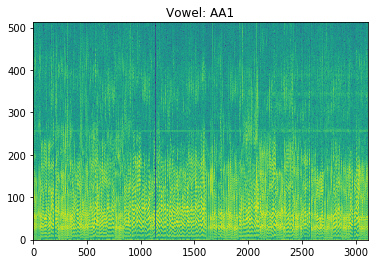

In [28]:
# Select vowel
which_vowel = 'AA1'
# Find indices
idx, _ = find_elements(which_vowel, labels)
# Plot
fig, ax = plt.subplots(facecolor='white')
ax.imshow(fft[idx,:].T, aspect='auto', origin='lower')
ax.set_title(f'Vowel: {which_vowel}');

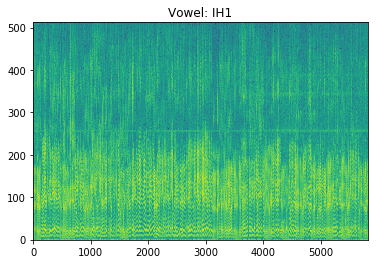

In [27]:
# Select vowel
which_vowel = 'IH1'
# Find indices
idx, _ = find_elements(which_vowel, labels)
# Plot
fig, ax = plt.subplots(facecolor='white')
ax.imshow(fft[idx,:].T, aspect='auto', origin='lower')
ax.set_title(f'Vowel: {which_vowel}');

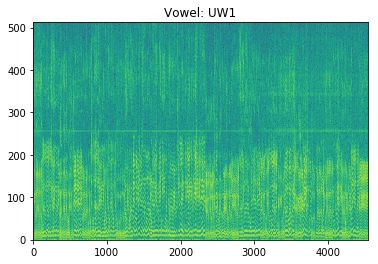

In [29]:
# Select vowel
which_vowel = 'UW1'
# Find indices
idx, _ = find_elements(which_vowel, labels)
# Plot
fig, ax = plt.subplots(facecolor='white')
ax.imshow(fft[idx,:].T, aspect='auto', origin='lower')
ax.set_title(f'Vowel: {which_vowel}');

## PCA를 해서 몇 개의 PC를 쓸지 확인하기

In [33]:
# PCA
num_comp = 40
pca = PCA(n_components=num_comp)
pca.fit(fft)
var_exp = pca.explained_variance_ratio_
print(var_exp)

[0.2195383  0.08855501 0.06252949 0.0457253  0.02748817 0.02518259
 0.0217292  0.01698665 0.01660057 0.0151641  0.01451138 0.01237947
 0.01130839 0.01041754 0.01004677 0.0096331  0.00912203 0.00830414
 0.00815747 0.00782184 0.00723403 0.0071308  0.00670442 0.00640319
 0.00617536 0.00595096 0.00565508 0.00541308 0.00528115 0.00486595
 0.0048154  0.0044759  0.0043773  0.00426453 0.00422052 0.00403337
 0.00388583 0.00368915 0.00364645 0.00359869]


In [34]:
# Cumulative sum
cum_sum = []
var = 0
for i, v in enumerate(var_exp):
    var = var + v
    cum_sum.append(var)

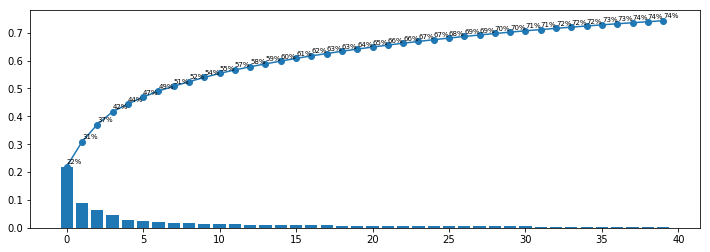

In [39]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,4))
ax.bar(np.arange(len(var_exp)), var_exp)
ax.plot(np.arange(len(var_exp)), cum_sum, 'o-')
for i in np.arange(len(var_exp)):
    ax.text(i, cum_sum[i]+0.01, f'{cum_sum[i]*100:.0f}%', fontsize=7)

### 너무 데이터에 redundancy가 많은지 PC들이 굉장히 많이 필요하다 --> linear filtered fft로 테스트 해보자

In [40]:
fftlin = np.load('fft_linfilt.npy')
pca = np.load('fft_linfilt_pca.npy').item()
reduced = np.load('fft_linfilt_pca_reduced.npy')
labels = np.load('labels.npy')

### 전체 플랏

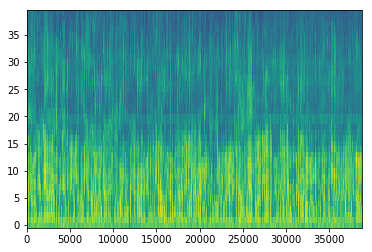

In [41]:
fig, ax = plt.subplots(facecolor='white')
ax.imshow(fftlin.T, aspect='auto', origin='lower')

### 모음 몇 개만

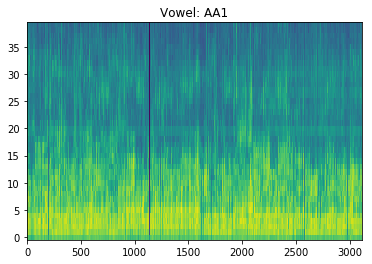

In [42]:
# Select vowel
which_vowel = 'AA1'
# Find indices
idx, _ = find_elements(which_vowel, labels)
# Plot
fig, ax = plt.subplots(facecolor='white')
ax.imshow(fftlin[idx,:].T, aspect='auto', origin='lower')
ax.set_title(f'Vowel: {which_vowel}');

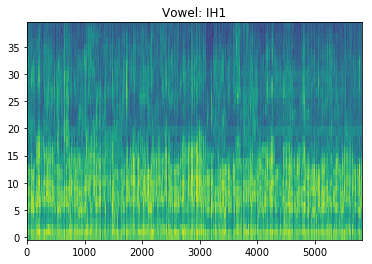

In [43]:
# Select vowel
which_vowel = 'IH1'
# Find indices
idx, _ = find_elements(which_vowel, labels)
# Plot
fig, ax = plt.subplots(facecolor='white')
ax.imshow(fftlin[idx,:].T, aspect='auto', origin='lower')
ax.set_title(f'Vowel: {which_vowel}');

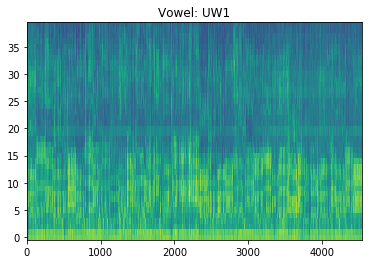

In [44]:
# Select vowel
which_vowel = 'UW1'
# Find indices
idx, _ = find_elements(which_vowel, labels)
# Plot
fig, ax = plt.subplots(facecolor='white')
ax.imshow(fftlin[idx,:].T, aspect='auto', origin='lower')
ax.set_title(f'Vowel: {which_vowel}');

In [45]:
var_exp = pca.explained_variance_ratio_
print(var_exp)

[0.39066018 0.13352806 0.10086059 0.07095034 0.04303008 0.03797593
 0.03252619 0.02420528 0.02186096 0.01689168 0.01456229 0.01284388
 0.01186538 0.01100419 0.00954683 0.00898005 0.00762344 0.00684329
 0.00615143 0.00487786 0.00434051 0.00385521 0.00325617 0.00296757
 0.00250105 0.00219528 0.00191407 0.00164642 0.00143237 0.00130124
 0.00112973 0.00107198 0.00092016 0.00084872 0.00078356 0.00071871
 0.00064258 0.00062252 0.00056285 0.00050138]


In [46]:
# Cumulative sum
cum_sum = []
var = 0
for i, v in enumerate(var_exp):
    var = var + v
    cum_sum.append(var)

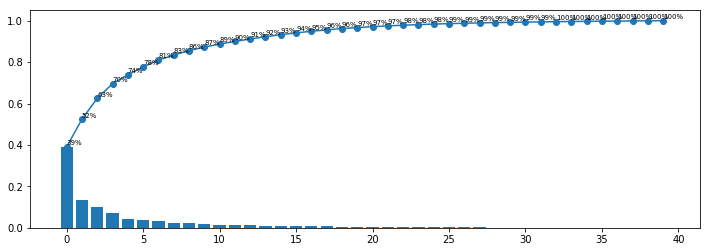

In [47]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,4))
ax.bar(np.arange(len(var_exp)), var_exp)
ax.plot(np.arange(len(var_exp)), cum_sum, 'o-')
for i in np.arange(len(var_exp)):
    ax.text(i, cum_sum[i]+0.01, f'{cum_sum[i]*100:.0f}%', fontsize=7)
ax.plot()    

In [52]:
PC = pca.components_.T # 36 x components
print(PC.shape)

(40, 40)


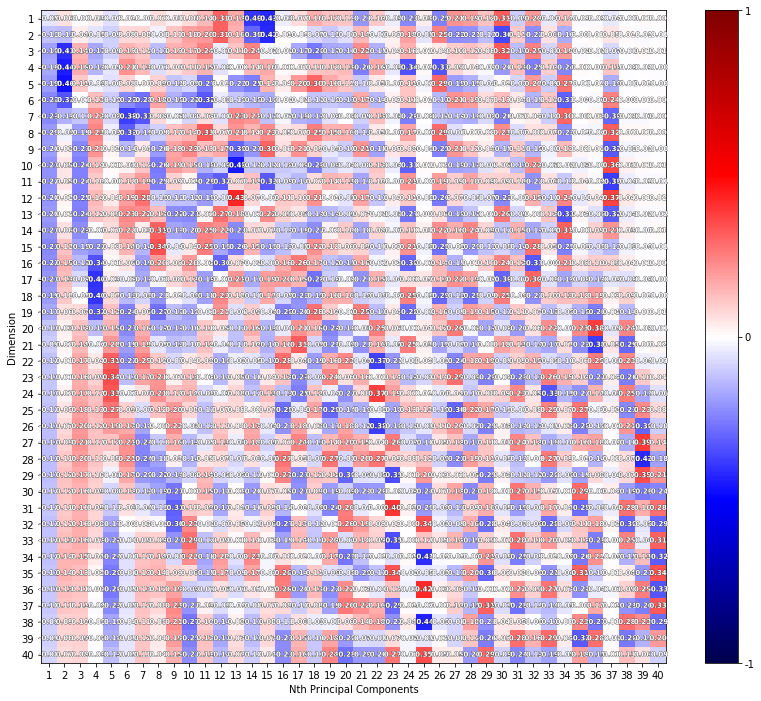

In [54]:
# Plot
fig, ax = plt.subplots(facecolor='white', figsize=(14,12))
im = ax.imshow(PC, aspect='auto', cmap=mpl.cm.seismic, 
               norm=mpl.colors.Normalize(vmin=-1,vmax=1))

# Colorbar
cbar = fig.colorbar(im, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['-1', '0', '1'])

# Axis
ax.xaxis.set_major_locator(MaxNLocator(num_comp))
ax.set_xticklabels([str(t) for t in range(PC.shape[1]+1)])
ax.yaxis.set_major_locator(MaxNLocator(PC.shape[0]))
ax.set_yticklabels([str(t) for t in range(PC.shape[0]+1)])
ax.set_xlabel('Nth Principal Components')
ax.set_ylabel('Dimension')

# Loop over data dimensions and create text annotations.
for i in range(PC.shape[0]):
    for j in range(PC.shape[1]):
        txt = ax.text(j, i, f'{PC[i, j]:.2f}', ha="center", va="center", 
                      color="w", weight='bold', fontsize=7)
        txt.set_path_effects([PathEffects.withStroke(linewidth=0.5, foreground='k')])

## 시각적으로 확인해본 결과 15개의 PC (93%)를 사용하는 것이 좋겠다는 생각이 듬. 

### phn2idx, idx2phn확인

In [56]:
phn2idx = np.load('phn2idx.npy').item()
idx2phn = np.load('idx2phn.npy').item()

In [57]:
phn2idx

{'AA1': 5,
 'AE1': 0,
 'AH1': 1,
 'AO1': 2,
 'EH1': 3,
 'IH1': 4,
 'IY1': 6,
 'UH1': 8,
 'UW1': 7}

In [58]:
idx2phn

{0: 'AE1',
 1: 'AH1',
 2: 'AO1',
 3: 'EH1',
 4: 'IH1',
 5: 'AA1',
 6: 'IY1',
 7: 'UW1',
 8: 'UH1'}